6B. Write a program to implement the naïve Bayesian classifier for a sample training data set stored as 
a .CSV file. Compute the accuracy of the classifier, considering few test data sets.

Naive Bayes algorithms for learning and classifying text

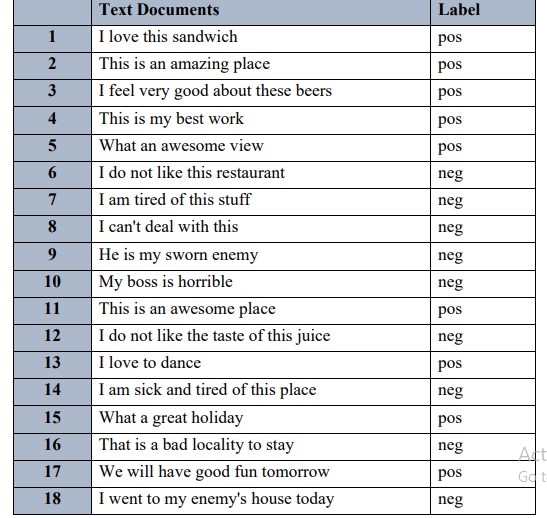

STEP 1

In [ ]:
import pandas as pd
msg=pd.read_csv('naivetext.csv',names=['message','label'])
print('The dimensions of the dataset',msg.shape)
msg['labelnum']=msg.label.map({'pos':1,'neg':0})
X=msg.message
y=msg.labelnum
print(X)
print(y)

STEP 2

In [ ]:
#splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y)
print ('\n The total number of Training Data :',ytrain.shape)
print ('\n The total number of Test Data :',ytest.shape)


STEP 3

Convert a collection of text documents to a matrix of token counts.

CountVectorizer is a great tool provided by the scikit-learn library in Python.

 It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. 
 
 This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample

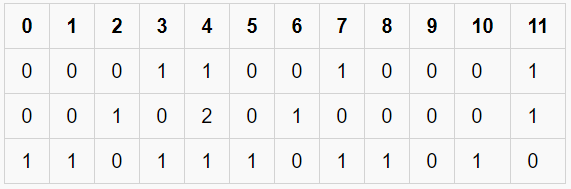

In [ ]:
#output of count vectoriser is a sparse matrix
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain)
xtest_dtm=count_vect.transform(xtest)
print('\n The words or Tokens in the text documents \n')
print(count_vect.get_feature_names())
df=pd.DataFrame(xtrain_dtm.toarray(),columns=count_vect.get_feature_names())


STEP 4

In [ ]:
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)


STEP 5

In [ ]:
#printing accuracy, Confusion matrix, Precision and Recall
from sklearn import metrics
print('\n Accuracy of the classifer is’,
metrics.accuracy_score(ytest,predicted))
print('\n Confusion matrix')
print(metrics.confusion_matrix(ytest,predicted))
print('\n The value of Precision' ,
metrics.precision_score(ytest,predicted))
print('\n The value of Recall' ,
metrics.recall_score(ytest,predicted))
